<h1><u>Predicción del riesgo de obesidad</u></h1>

![Esta es una imagen de ejemplo](https://img.chemie.de/Portal/News/63871bf15d4a8_dZbm9nLX1.png?tr=w-1029,h-772,cm-extract,x--6,y-182:n-xzoom)

**Índice de contenidos**<a id='toc0_'></a>    
1. [Carga de librerías y configuraciones](#toc1_)    
2. [EDA](#toc2_)    
2.1. [Carga datos](#toc2_1_)    
2.2. [Significado de las columnas](#toc2_2_)    
2.3. [Objetivo](#toc2_3_)    
2.4. [Descripción del conjunto de datos](#toc2_4_)    
2.5. [Diccionarios](#toc2_5_)    
2.6. [Target](#toc2_6_)    
3. [Problema Machine Learning](#toc3_)    
4. [Feature Engineering](#toc4_)    
5. [Análisis univariante](#toc5_)    
6. [Análisis bivariante](#toc6_)    
7. [Eliminación de features](#toc7_)    
8. [Correlación](#toc8_)    
9. [Anomalías y errores](#toc9_)    
10. [Transformaciones (Encoding)](#toc10_)    
11. [División train y test](#toc11_)    
12. [Feature Reduction](#toc12_)    
13. [Escoger métrica del modelo](#toc13_)    
13.1. [Métricas de clasificación](#toc13_1_)    
14. [Baselines](#toc14_)    
15. [Elegir hiperparámetros: Fine tuning](#toc15_)    
15.1.1. [Finetuning por RandomSearchCV](#toc15_1_1_)    
15.2. [Finetuning por Optuna](#toc15_2_)    
15.3. [Finetuning por Pycaret](#toc15_3_)    
16. [Validación, prestaciones, ROC AUC](#toc16_)    
17. [Metamodelo](#toc17_)    
17.1. [Voting](#toc17_1_)    
17.2. [Stacking](#toc17_2_)    
18. [Deep Learning](#toc18_)    
19. [Validación Final](#toc19_)    
20. [Explicabilidad](#toc20_)    
21. [Predicción](#toc21_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

__________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________


# 1. <a id='toc1_'></a>[Carga de librerías y configuraciones](#toc0_)

In [180]:
# warnings
import warnings
warnings.filterwarnings("ignore")

In [181]:
# Carga funciones propias reutilizables  de librerías
import os as so
import sys
utils_path = so.path.join(so.getcwd(), '..', 'utils')
sys.path.append(utils_path)

In [182]:
class PATH():
    RAW = '../data/raw//'
    PROCESSED= '../data/processed//'
    MODELS = '../models//'
    REPORTS = '../reports//'


In [183]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [184]:
import pandas as pd
import numpy as np
import pickle

In [185]:
# pandas config
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [187]:
# seaborn config
colors_palette=sns.color_palette('colorblind')

In [188]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, PowerTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [189]:
import python_clustering

In [190]:
from BorutaShap import BorutaShap

In [191]:
from utils import *

# 2. <a id='toc2_'></a>[EDA](#toc0_)

## 2.1. <a id='toc2_1_'></a>[Carga datos](#toc0_)


In [192]:
df_train = pd.read_csv(PATH.RAW + 'train.csv')
df_test = pd.read_csv(PATH.RAW +'test.csv')

## 2.2. <a id='toc2_2_'></a>[Significado de las columnas](#toc0_)

Los atributos relacionados con los hábitos alimenticios son: 
- Consumo frecuente de alimentos altos en calorías (FAVC)
- Frecuencia de consumo de vegetales (FCVC)
- Número de comidas principales (NCP)
- Consumo de alimentos entre comidas (CAEC)
- Consumo de agua diario (CH20)
- Consumo de alcohol (CALC)

Los atributos relacionados con la condición física son: 
- Monitoreo del consumo de calorías (SCC)
- Frecuencia de actividad física (FAF)
- Tiempo utilizando dispositivos tecnológicos (TUE)
- Transporte utilizado (MTRANS)

Variables obtenidas: Género, Edad, Altura y Peso.

Los valores de NO obesidad son:

- Bajo peso: Menos de 18.5
- Normal: 18.5 a 24.9
- Sobrepeso: 25.0 a 29.9
- Obesidad I: 30.0 a 34.9
- Obesidad II: 35.0 a 39.9
- Obesidad III: Más de 40

Los datos contienen datos numéricos y datos continuos, por lo que pueden ser utilizados para análisis basados en algoritmos de clasificación, predicción, segmentación y asociación.

## 2.3. <a id='toc2_3_'></a>[Objetivo](#toc0_)
Tenemos que predecir el riesgo de obesidad en individuos.

## 2.4. <a id='toc2_4_'></a>[Descripción del conjunto de datos](#toc0_)

| Columna                        | Forma completa                   | Descripción                                                                                                          |
|-------------------------------|----------------------------------|----------------------------------------------------------------------------------------------------------------------|
| 'id'                          | id                               | Único para cada persona (fila)                                                                                       |
| 'Gender'                      | Género                           | Género de la persona                                                                                                 |
| 'Age'                        | Edad                             | Dtype es float. La edad está entre 14 años y 61 años                                                                 |
| 'Height'                      | Altura                           | La altura está en metros, está entre 1,45 m y 1,98 m                                                                |
| 'Weight'                        | Peso                             | El peso está entre 39 y 165. Creo que está en Kg.                                                                   |
| 'family_history_with_overweight' | historia familiar con sobrepeso | pregunta de sí o no                                                                                                  |
| 'FAVC'                        | Consumo frecuente de alimentos altos en calorías | pregunta de sí o no. Creo que la pregunta que hicieron es si consumes alimentos altos en calorías                |
| 'FCVC'                        | Frecuencia de consumo de verduras | Similar a FAVC. También es una pregunta de sí o no                                                                  |
| 'NCP'                         | Número de comidas principales   | dtype es float, NCP está entre 1 y 4. Creo que debería ser 1,2,3,4 pero nuestros datos son sintéticos así que toma valores flotantes |
| 'CAEC'                        | Consumo de alimentos entre comidas | toma 4 valores: A veces, Frecuentemente, no y Siempre                                                              |
| 'SMOKE'                       | Fumar                            | pregunta de sí o no. Creo que la pregunta es "¿Fumas?"                                                              |
| 'CH2O'                        | Consumo de agua diario          | CH2O toma valores entre 1 y 3. de nuevo se da como flotante: los valores deberían ser 1,2 o 3 |
| 'SCC'                         | Monitoreo del consumo de calorías | pregunta de sí o no                                                                                                  |
| 'FAF'                         | Frecuencia de actividad física  | FAF está entre 0 y 3, 0 significa no hay actividad física y 3 significa un alto nivel de ejercicio. y nuevamente, en nuestros datos se da como flotante |
| 'TUE'                         | Tiempo utilizando dispositivos tecnológicos | TUE está entre 0 y 2. Creo que la pregunta será "¿Cuánto tiempo has estado usando dispositivos tecnológicos para rastrear tu salud?" en nuestros datos se da como flotante |
| 'CALC'                        | Consumo de alcohol              | Toma 3 valores: A veces, no, Frecuentemente                                                                          |
| 'MTRANS'                      | Transporte utilizado            | MTRANS toma 5 valores: Transporte Público, Automóvil, Caminar, Motocicleta y Bicicleta                            |
| 'NObeyesdad'                  | OBJETIVO                         | Objetivo, toma 7 valores, y en esta competencia tenemos que dar el nombre de la clase (No la Probabilidad, que es el caso en la mayoría de las competiciones). |


## 2.5. <a id='toc2_5_'></a>[Diccionarios](#toc0_)

In [193]:
diccionario_columnas = {
    'FAVC': 'Consumo frecuente de alimentos altos en calorías',
    'FCVC': 'Frecuencia de consumo de vegetales',
    'NCP': 'Número de comidas principales',
    'CAEC': 'Consumo de alimentos entre comidas',
    'CH20': 'Consumo de agua diario',
    'CALC': 'Consumo de alcohol',
    'SCC': 'Monitoreo del consumo de calorías',
    'FAF': 'Frecuencia de actividad física',
    'TUE': 'Tiempo utilizando dispositivos tecnológicos',
    'MTRANS': 'Transporte utilizado',
    'Age':'Edad',
    'Height': 'Altura',
    'Weight':'Peso',
    'SMOKE':'Fumador',
    'Gender':'Género',
    'IMC':'Indice de Masa Corporal',
    'HA': 'Hábitos alimienticios',
    'UT': 'Uso de Tecnología',
    'family_history_with_overweight':'Historial familiar con sobrepeso'
}


## 2.6. <a id='toc2_6_'></a>[Target](#toc0_)
   

In [194]:
target = "NObeyesdad"

In [195]:
dict_target={'Insufficient_Weight': 0,
 'Normal_Weight': 1,
 'Overweight_Level_I': 2,
 'Overweight_Level_II': 3,
  'Obesity_Type_I': 4,
 'Obesity_Type_II': 5,
 'Obesity_Type_III': 6,}


In [196]:
dictrev_target={v:k for k,v in  dict_target.items()}


1.3 Vistazo rápido

In [197]:
df=df_train.copy()

In [198]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II


In [199]:
df.tail()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
20753,20753,Male,25.14,1.77,114.19,yes,yes,2.92,3.00,Sometimes,no,2.15,no,1.33,0.20,Sometimes,Public_Transportation,Obesity_Type_II
20754,20754,Male,18.00,1.71,50.00,no,yes,3.00,4.00,Frequently,no,1.00,no,2.00,1.00,Sometimes,Public_Transportation,Insufficient_Weight
20755,20755,Male,20.10,1.82,105.58,yes,yes,2.41,3.00,Sometimes,no,2.00,no,1.16,1.20,no,Public_Transportation,Obesity_Type_II
20756,20756,Male,33.85,1.70,83.52,yes,yes,2.67,1.97,Sometimes,no,2.14,no,0.00,0.97,no,Automobile,Overweight_Level_II
20757,20757,Male,26.68,1.82,118.13,yes,yes,3.00,3.00,Sometimes,no,2.00,no,0.68,0.71,Sometimes,Public_Transportation,Obesity_Type_II


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [201]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,20758.00,NaN,NaN,NaN,10378.50,5992.46,0.00,5189.25,10378.50,15567.75,20757.00
Gender,20758,2,Female,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,20758.00,NaN,NaN,NaN,23.84,5.69,14.00,20.00,22.82,26.00,61.00
Height,20758.00,NaN,NaN,NaN,1.70,0.09,1.45,1.63,1.70,1.76,1.98
Weight,20758.00,NaN,NaN,NaN,87.89,26.38,39.00,66.00,84.06,111.60,165.06
family_history_with_overweight,20758,2,yes,17014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FAVC,20758,2,yes,18982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FCVC,20758.00,NaN,NaN,NaN,2.45,0.53,1.00,2.00,2.39,3.00,3.00
NCP,20758.00,NaN,NaN,NaN,2.76,0.71,1.00,3.00,3.00,3.00,4.00
CAEC,20758,4,Sometimes,17529,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
data_report(df)

COL_N,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
DATA_TYPE,int64,object,float64,float64,float64,object,object,float64,float64,object,object,float64,object,float64,float64,object,object,object
MISSINGS (%),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
UNIQUE_VALUES,20758,2,1703,1833,1979,2,2,934,689,4,2,1506,2,1360,1297,3,5,7
CARDIN (%),100.00,0.01,8.20,8.83,9.53,0.01,0.01,4.50,3.32,0.02,0.01,7.26,0.01,6.55,6.25,0.01,0.02,0.03


Highlights: Sin missings, no tiene mucha cardinalidad.

In [203]:
contains_inf = df.isin([np.inf, -np.inf]).any().any()
contains_inf

False

No hay infinitos

In [204]:
duplicados = df.duplicated().any()
duplicados

False

Sin duplicados

In [205]:
categoricas = df.columns[df.dtypes=="object"].tolist()
numericas = df.columns[df.dtypes!="object"].tolist()

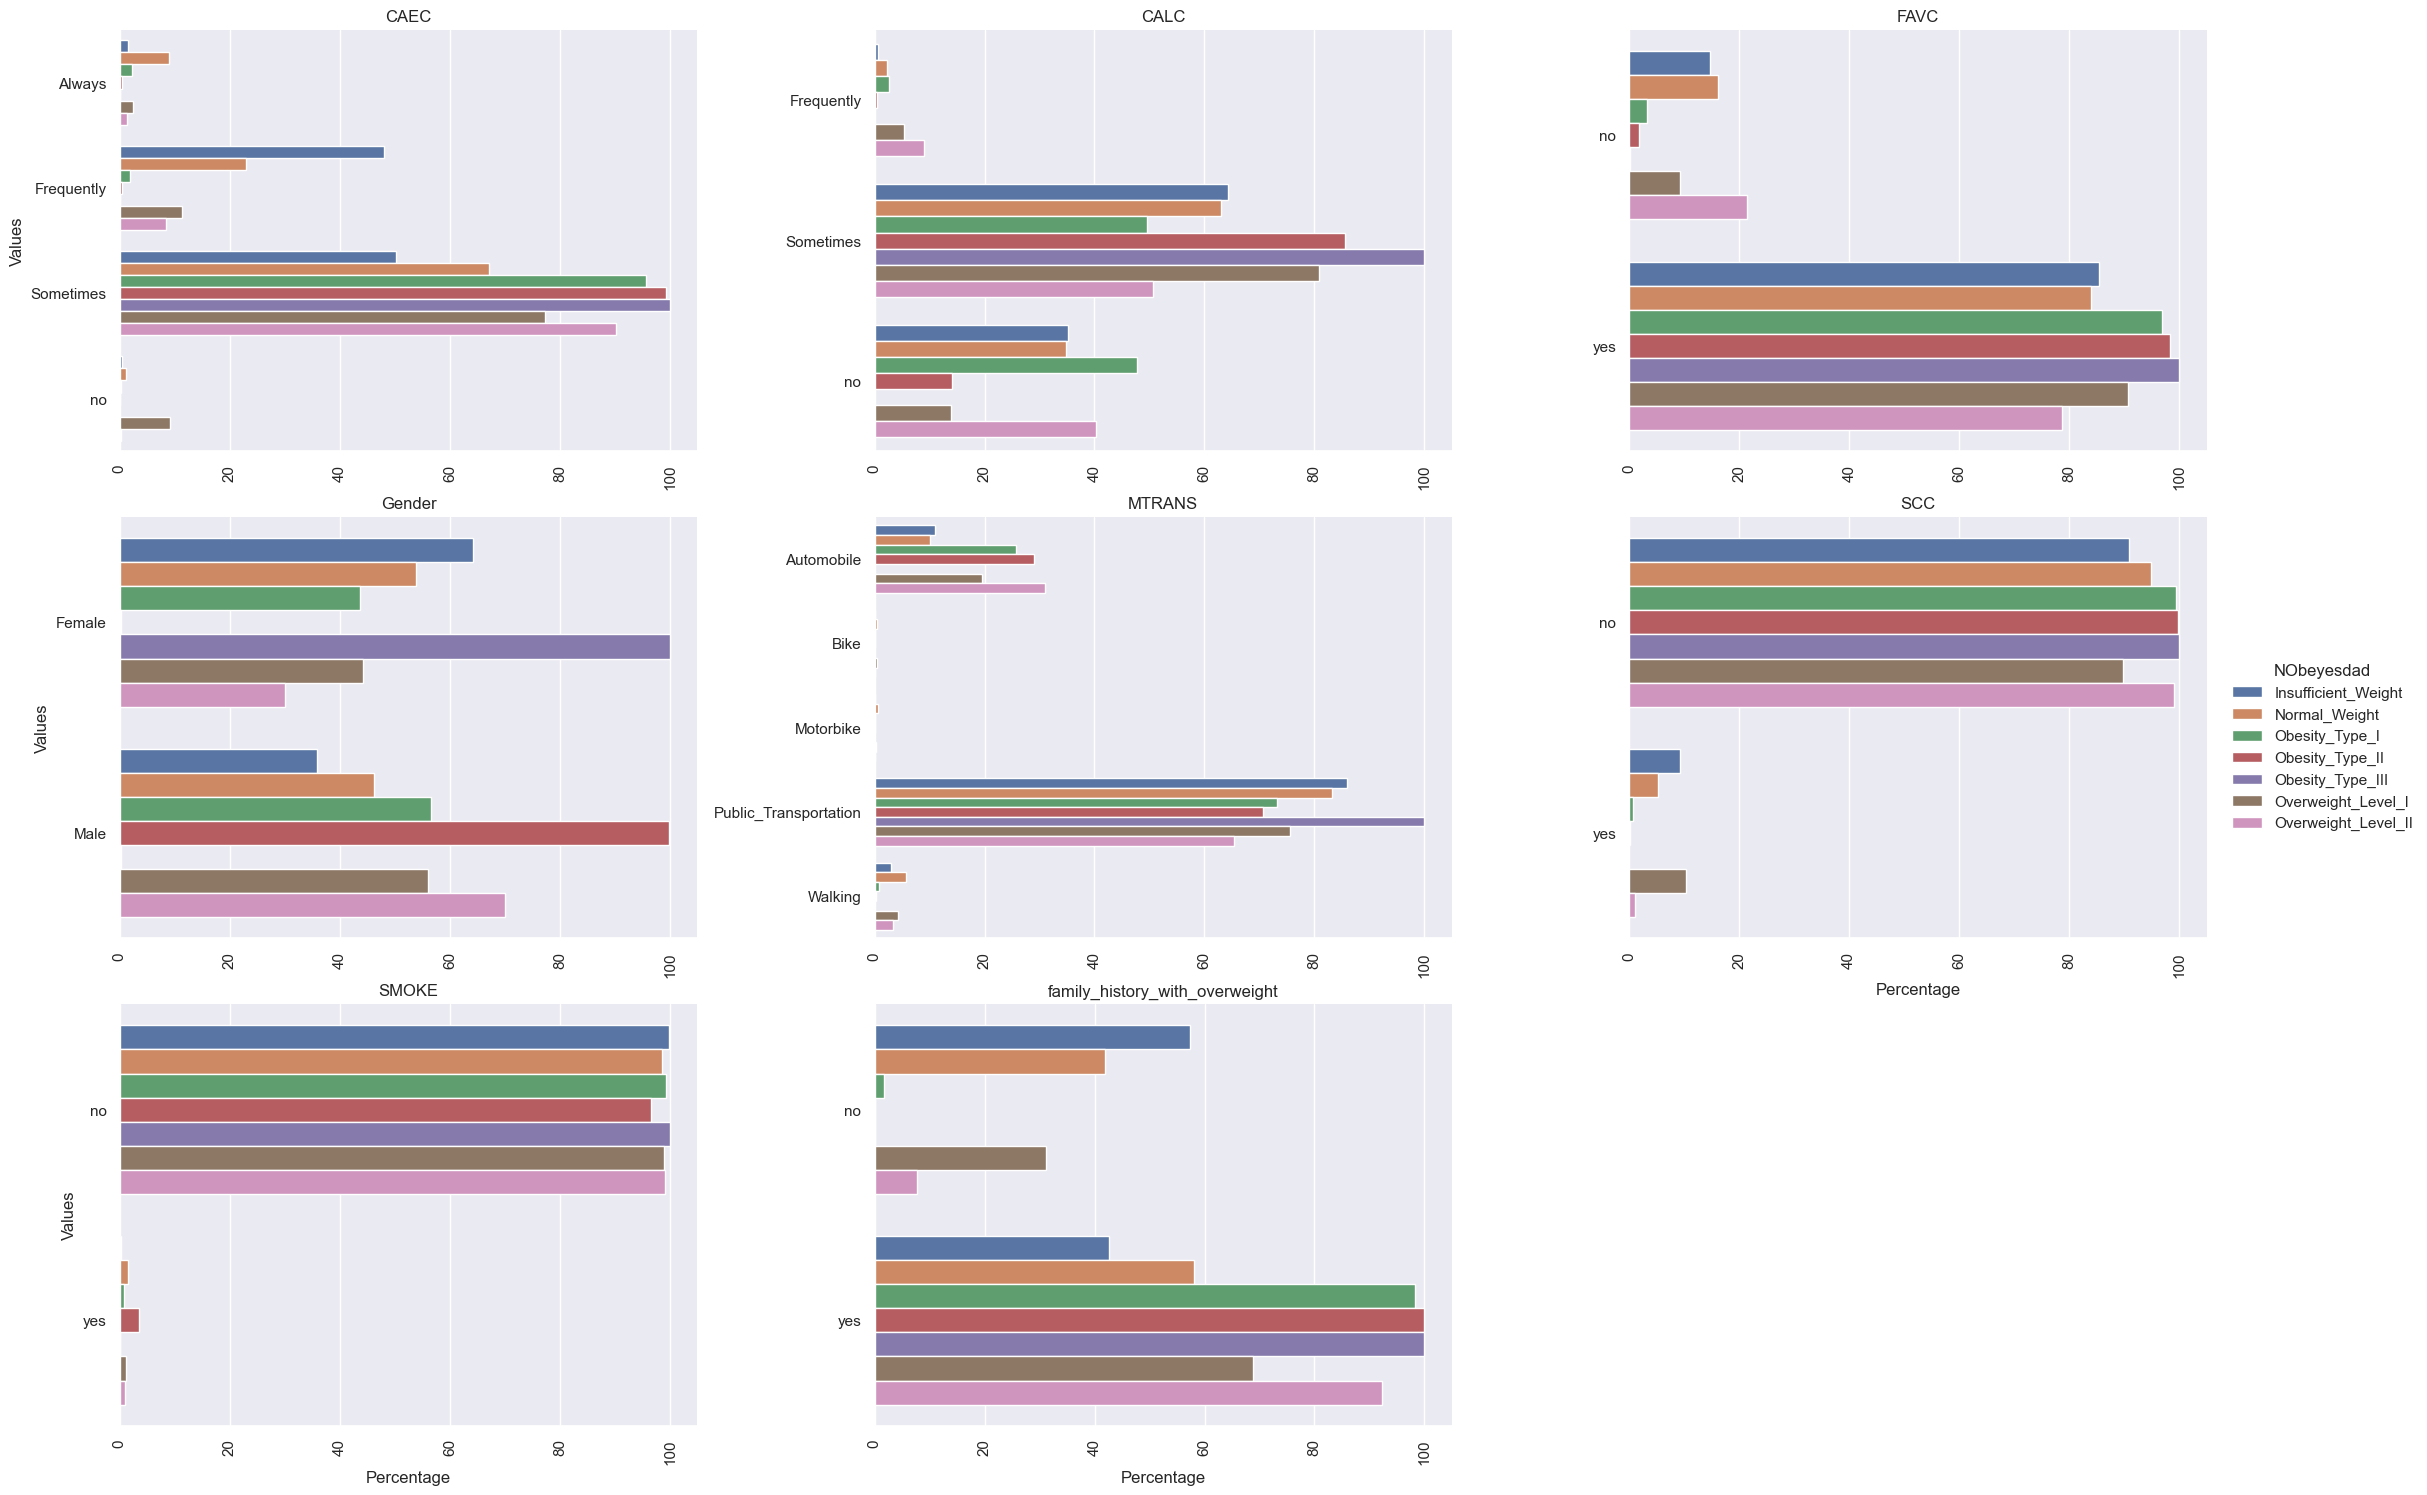

In [206]:
plot_tidy_categorical(df, categoricas, target)

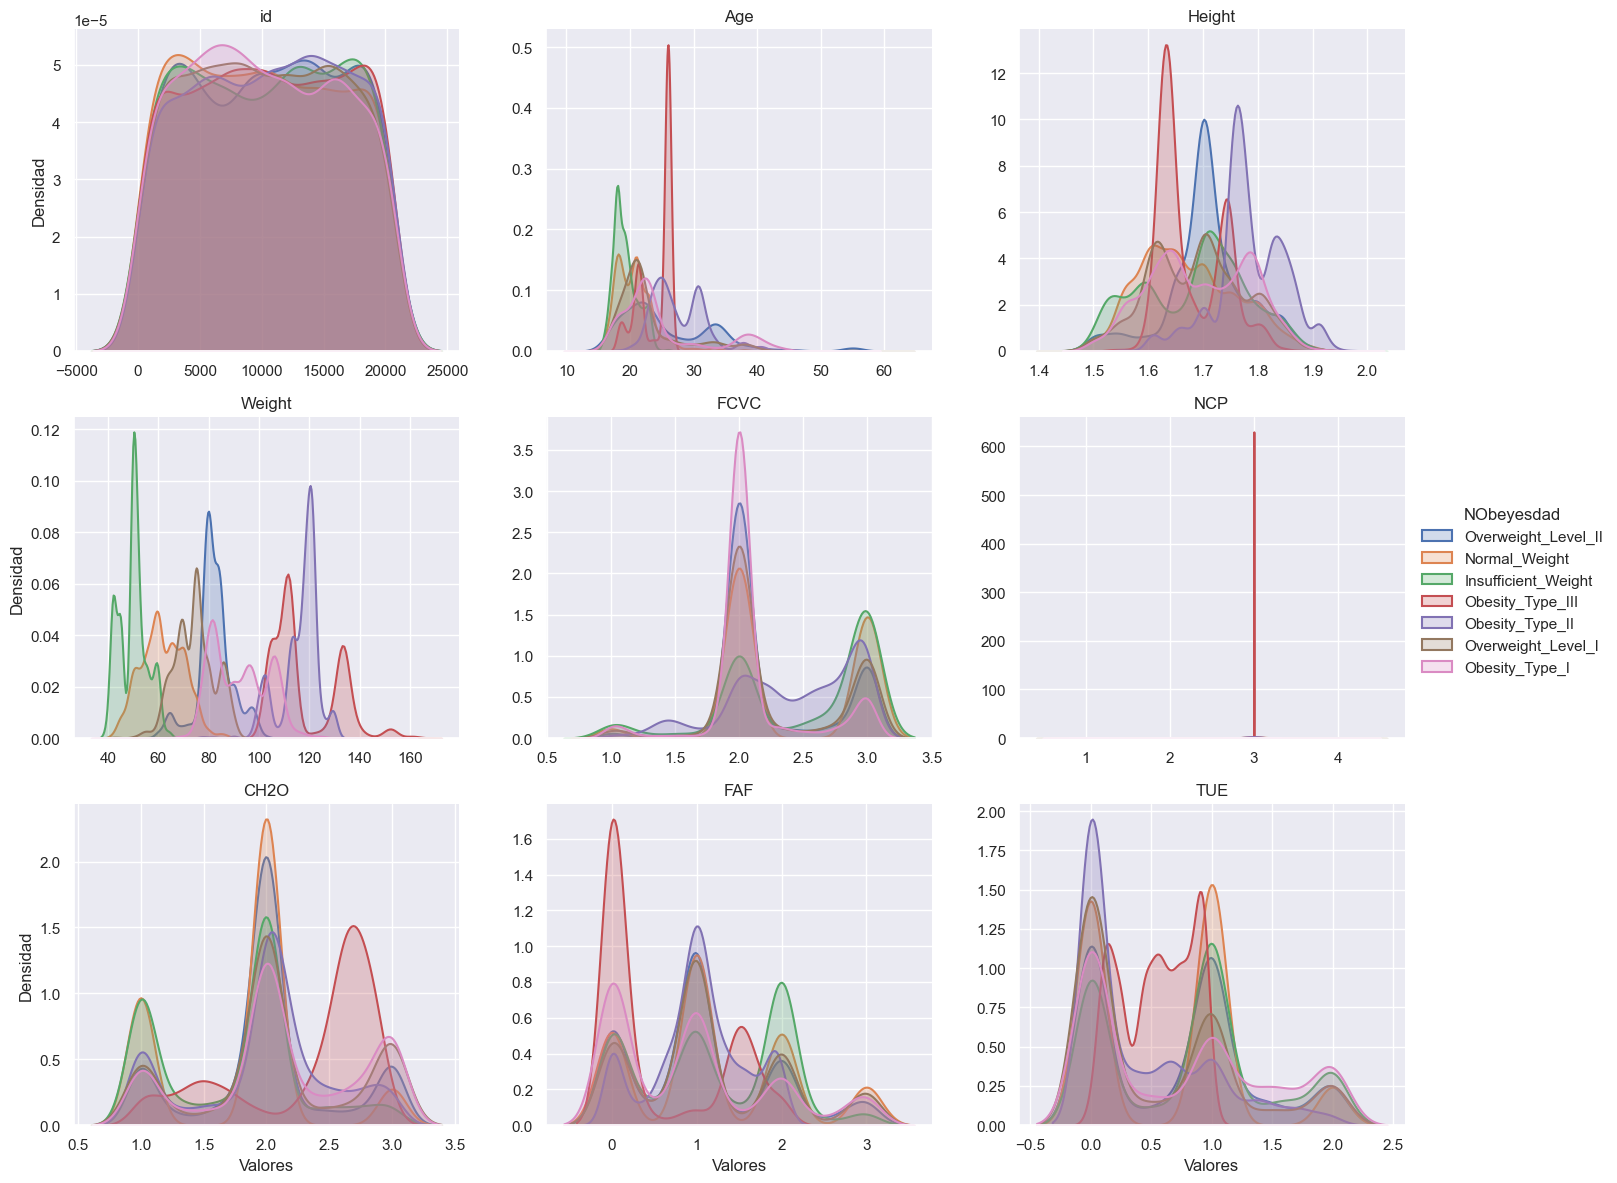

In [207]:
plot_tidy(df, numericas, target)

# 3. <a id='toc3_'></a>[Problema Machine Learning](#toc0_)
   

In [67]:
df[target].value_counts() / len(df[target])

NObeyesdad
Obesity_Type_III      0.19
Obesity_Type_II       0.16
Normal_Weight         0.15
Obesity_Type_I        0.14
Insufficient_Weight   0.12
Overweight_Level_II   0.12
Overweight_Level_I    0.12
Name: count, dtype: float64

Al examinar la distribución del objetivo, podemos deducir lo siguiente:

- Se trata de un problema de clasificación múltiple, con 7 clases.
- Las clases están distribuidas de manera diferente, pero no hay diferencias extremas en sus proporciones (probabilidad media).
- Sin embargo, la clase más frecuente (Obesidad_Tipo_III) tiene casi el doble de probabilidad que la menos frecuente (Sobrepeso_Nivel_I). Por lo tanto, al definir la estrategia de validación cruzada, será estratificada  para que las diferentes probabilidades previas se reflejen lo más exactamente posible también en el conjunto de prueba.

# 4. <a id='toc4_'></a>[Feature Engineering](#toc0_)


![](https://www.medindia.net/patients/calculators/images/body-mass-index-bmi-chart.jpg)

Índice de Masa Corporal (IMC):
Utilizando las características de 'Altura' y 'Peso'. El IMC, una métrica ampliamente reconocida, indica la obesidad al proporcionar una representación más precisa de la relación entre el peso y la altura de un individuo.

Hábitos Alimenticios (HA):
La combinación de 'FCVC' (Frecuencia de consumo de vegetales) y 'NCP' (Número de comidas principales) creó la característica 'Hábitos_Alimenticios'. Esta característica busca encapsular los patrones dietéticos generales, considerando tanto la frecuencia de consumo de vegetales como el número de comidas principales.

Puntuación de Uso de Tecnología (UT):
Se creó una puntuación integral ponderando la frecuencia de uso de la tecnología ('UT') por la edad del individuo. La puntuación resultante de 'Uso_de_Tecnología' tiene como objetivo cuantificar el tiempo promedio que se pasa utilizando la tecnología en relación con la edad de la persona, proporcionando una perspectiva matizada sobre los hábitos tecnológicos.

Hay columnas que tienen orden y que deben convertirse a variables discretas. Las mapeo también.

In [23]:
dict_CAEC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}
dict_CALC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}

In [24]:
def Feature_Engineering(df):
        try:
            df.set_index('id', inplace=True)
            df['IMC'] = df['Weight'] / (df['Height'] ** 2)
            df['HA'] = df['FCVC'] * df['NCP']
            df['UT'] = df['TUE'] / df['Age']
            df['CALC']=df['CALC'].map(dict_CALC)
            df['CAEC']=df['CAEC'].map(dict_CAEC)
        except:
            pass
        return df

In [25]:
df_train = Feature_Engineering(df_train)
df_test = Feature_Engineering(df_test)
df = Feature_Engineering(df)
numericas = df.columns[df.dtypes!="object"].tolist()

In [27]:
diccionario_columnas = {
    'FAVC': 'Consumo frecuente de alimentos altos en calorías',
    'FCVC': 'Frecuencia de consumo de vegetales',
    'NCP': 'Número de comidas principales',
    'CAEC': 'Consumo de alimentos entre comidas',
    'CH20': 'Consumo de agua diario',
    'CALC': 'Consumo de alcohol',
    'SCC': 'Monitoreo del consumo de calorías',
    'FAF': 'Frecuencia de actividad física',
    'TUE': 'Tiempo utilizando dispositivos tecnológicos',
    'MTRANS': 'Transporte utilizado',
    'Age':'Edad',
    'Height': 'Altura',
    'Weight':'Peso',
    'SMOKE':'Fumador',
    'Gender':'Género',
    'IMC':'Indice de Masa Corporal',
    'HA': 'Hábitos alimienticios',
    'UT': 'Uso de Tecnología',
    'family_history_with_overweight':'Historial familiar con sobrepeso'
}


In [72]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,IMC,HA,UT
id,,,,,,,,,,,,,,,,,,,,
0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,1,no,2.76,no,0.00,0.98,1,Public_Transportation,Overweight_Level_II,28.26,5.97,0.04
1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,2,no,2.00,no,1.00,1.00,0,Automobile,Normal_Weight,23.42,6.00,0.06
2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,1,no,1.91,no,0.87,1.67,0,Public_Transportation,Insufficient_Weight,17.13,2.65,0.09
3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,1,no,1.67,no,1.47,0.78,1,Public_Transportation,Obesity_Type_III,44.86,9.00,0.04
4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,1,no,1.98,no,1.97,0.93,1,Public_Transportation,Overweight_Level_II,25.60,5.28,0.03


# 5. <a id='toc5_'></a>[Análisis univariante](#toc0_)


In [ ]:
categoricas = df.columns[df.dtypes=="object"].tolist()
numericas = df.columns[df.dtypes!="object"].tolist()

In [ ]:
plot_horizontal_catplot(df, categoricas, diccionario_columnas)

In [ ]:
df[target]=df[target].map(dict_target)

In [ ]:
for col in numericas:
    plot_distribucion(df,col, title=diccionario_columnas.get(col, col))

# 6. <a id='toc6_'></a>[Análisis bivariante](#toc0_)


In [ ]:
sns.set_theme(style='white')
sns.pairplot(df,kind="reg",diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True,hue=target)
plt.tight_layout()
plt.show()


In [ ]:
for col in numericas:
    plot_analysis(df,target,col)


# 7. <a id='toc7_'></a>[Eliminación de features](#toc0_)


In [ ]:
df = drop_cols(df, max_cardi=20, max_miss=30)

# 8. <a id='toc8_'></a>[Correlación](#toc0_)

In [ ]:
import phik
phik_matrix = df.phik_matrix()

plt.figure(figsize=(25,10))
sns.heatmap(phik_matrix,
            vmin=0,
            vmax=1,
            center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=10),
            square=True,
            annot=True,
            linewidths=.5);

# 9. <a id='toc9_'></a>[Anomalías y errores](#toc0_)


No se han encontrado a la vista.
Se toman como anomalía los outliners que luego se detecten.


# 10. <a id='toc10_'></a>[Transformaciones (Encoding)](#toc0_)
    

In [ ]:
def sqrt_transform(X):
    return np.sqrt(X)

def log_transform(X):
    return np.log1p(X)

In [ ]:
classify_distributions(df, threshold=0.05)

In [ ]:
df.head()

In [ ]:
# target no necesita transformación
y = df[target]

Guardo df, df_train y df_test antes de transformarlas

In [ ]:
# Save df as pickle
df.to_pickle(PATH.PROCESSED + 'df.pkl')
df_train.to_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test.to_pickle(PATH.PROCESSED + 'df_test.pkl')

In [ ]:
# Load df as pickle
df = pd.read_pickle(PATH.PROCESSED + 'df.pkl')
df_train = pd.read_pickle(PATH.PROCESSED + 'df_train.pkl')
df_test = pd.read_pickle(PATH.PROCESSED + 'df_test.pkl')

Pipeline para transformar las columnas. Para ver la significancia, lo tengo que pasar a numéricas y ya veré si posteriormente elimino columnas antes de quitar outliners.

In [ ]:
dist_class = classify_distributions(df, threshold=0.05)

In [ ]:
list(df.select_dtypes(include=['number']).columns)


In [57]:
def Encoder(df, target_col, threshold=0.05, onlydf=True):
    if target_col not in df.columns:
        X = df.copy()
    else:
        X = df.drop(columns=[target_col])

    dist_class = classify_distributions(X, threshold)
    
    categorical_columns = list(X.select_dtypes(include=['object']).columns)

    if categorical_columns:
        categorical_pipeline = Pipeline([
            ('onehot', OneHotEncoder(drop='first'))
        ])
    else:
        categorical_pipeline = None
    
    numeric_columns_to_transform = [col for col, (dist,model) in dist_class.items()]
    untouched_columns = list(set(X.columns) - set(categorical_columns) - set(numeric_columns_to_transform))

    numeric_transformers = [
        ('sqrt_transform', FunctionTransformer(sqrt_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_increasing']),
        ('log_transform', FunctionTransformer(log_transform), [col for col, (dist, _) in dist_class.items() if dist == 'positive_decreasing']),
        ('yeojohnson_transform', PowerTransformer(method='yeo-johnson'), [col for col, (dist, _) in dist_class.items() if dist not in ['positive_increasing', 'positive_decreasing']]),
        ('untouched', 'passthrough', untouched_columns)
    ]

    numeric_pipeline = Pipeline([
        ('transformation', ColumnTransformer(
            transformers=numeric_transformers,
            remainder='passthrough')
        ),
        ('scaler', StandardScaler())
    ])

    if categorical_pipeline:
        preprocessor = ColumnTransformer([
            ('categorical', categorical_pipeline, categorical_columns),
            ('numeric', numeric_pipeline, numeric_columns_to_transform)
        ])
    else:
        preprocessor = numeric_pipeline

    final_pipeline = Pipeline([
        ('preprocessor', preprocessor)
    ])

    required_columns = set([col for col, _ in dist_class.items()])
    if not required_columns.issubset(X.columns):
        missing_columns = required_columns - set(X.columns)
        raise ValueError(f"Missing columns: {missing_columns}")

    X_trans = final_pipeline.fit_transform(X)
    transformed_columns = []

    # Obtener columnas transformadas de OHE
    if categorical_columns:
        ohe_columns = final_pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out()
        transformed_columns.extend(ohe_columns)

    # Obtener columnas transformadas de variables numéricas
    numeric_transformer = final_pipeline.named_steps['preprocessor'].named_transformers_['numeric'].named_steps['transformation']
    numeric_columns_transformed = [col for name, transformer, col in numeric_transformer.transformers_ if transformer != 'drop']
    transformed_columns.extend(numeric_columns_transformed)

    # Obtener columnas restantes
    remaining_columns = list(X.columns.difference(categorical_columns + numeric_columns_to_transform))
    transformed_columns.extend(remaining_columns)
    transformed_columns=list(pd.DataFrame(transformed_columns)[0].explode().dropna())
    if onlydf:
        return pd.DataFrame(X_trans, columns=transformed_columns)
    else:
        return X_trans,final_pipeline,transformed_columns


    


In [67]:
X_trans,final_pipeline,transformed_columns=Encoder(df, target, threshold=0.05,onlydf=False)

In [68]:
transformed_columns=['Gender_Male',
 'family_history_with_overweight_yes',
 'FAVC_yes',
 'SMOKE_yes',
 'SCC_yes',
 'MTRANS_Bike',
 'MTRANS_Motorbike',
 'MTRANS_Public_Transportation',
 'MTRANS_Walking',
 'Age',
 'NCP',
 'Height',
 'Weight',
 'FCVC',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC',
 'IMC',
 'HA',
 'UT']


In [69]:
# Save pipeline to pickle:
with open(PATH.MODELS+'encoder_pipeline.pkl', 'wb') as file:
        pickle.dump(final_pipeline, file)

In [ ]:
#load df_test as pickle
df_test = pd.read_pickle(PATH.PROCESSED + 'df_test.pkl')

In [ ]:
len(df_test.columns)

In [ ]:
Encoder(df_test, target, threshold=0.05)

In [ ]:
X_test.head(1)

In [ ]:
X_test=Encoder(df_test, target, threshold=0.05)

In [ ]:
#save X_test as pickle
X_test.to_pickle(PATH.PROCESSED + 'X_test.pkl')

# 11. <a id='toc11_'></a>[División train y test](#toc0_)
   

En la división aprovecho a quitar los outliiers para trabajos los modelos baselines

In [ ]:
from pyod.models.ecod import ECOD

In [ ]:
def outlier_split(X_trans,y, test_size=0.2):
    Xout=X_trans.copy()
    outclf = ECOD(n_jobs=-1)
    outclf.fit(Xout)
    mask = outclf.labels_  # binary labels (0: inliers, 1: outliers)
    X_trans_out=X_trans[mask==0]
    X_trans_out=pd.DataFrame(data=X_trans_out, columns=X_trans.columns)
    y_out=[y for  i,y in enumerate(y) if mask[i]==0]
    X_train, X_val, y_train, y_val = train_test_split(X_trans_out, y_out, test_size=test_size, random_state=123)
    return X_train, X_val, y_train, y_val

In [ ]:
X_train, X_val, y_train, y_val=outlier_split(X_trans,y, test_size=0.2)

In [ ]:
trainval=['X_train', 'X_val','y_train', 'y_val']
for data in trainval:
    if  isinstance(data,pd.DataFrame):
        globals()[data]=reduce_memory_usage(globals()[data])
    else:
        globals()[data]=reduce_memory_usage(pd.DataFrame((globals()[data])))

In [ ]:
# Guardar X_train, X_val, y_train, y_val
X_train.to_pickle(PATH.PROCESSED + 'X_train.pkl')
X_val.to_pickle(PATH.PROCESSED + 'X_val.pkl')
y_train.to_pickle(PATH.PROCESSED + 'y_train.pkl')
y_val.to_pickle(PATH.PROCESSED + 'y_val.pkl')

In [ ]:
# Leer X_train, X_val, y_train, y_val
X_train = pd.read_pickle(PATH.PROCESSED + 'X_train.pkl')
X_val = pd.read_pickle(PATH.PROCESSED + 'X_val.pkl')
y_train = pd.read_pickle(PATH.PROCESSED + 'y_train.pkl')
y_val = pd.read_pickle(PATH.PROCESSED + 'y_val.pkl')
X_test = pd.read_pickle(PATH.PROCESSED + 'X_test.pkl')


# 12. <a id='toc12_'></a>[Feature Reduction](#toc0_)


In [ ]:
import random

def generate_random_numbers(dataframe_length, num_numbers=2000):
    return [random.randint(0, dataframe_length - 1) for _ in range(num_numbers)]


Por cuestión de tiempo de computación  no hago análsiis de todo el DataFrame. En su defecto, hago un random sample mayor del 10% de la muestra y lo tomo como representativo.

In [ ]:
generate_random_numbers=generate_random_numbers(len(X_train),num_numbers=2000)
X_train_=X_train.iloc[generate_random_numbers]
y_train_=y_train.iloc[generate_random_numbers]

In [ ]:
selvars=selvars_boruta(X_train_,y_train_,isclass=True,n_trials=100)
selvars

In [114]:
selvars=['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FCVC',
 'Gender_Male',
 'HA',
 'Height',
 'IMC',
 'MTRANS_Public_Transportation',
 'NCP',
 'TUE',
 'UT',
 'Weight',
 'family_history_with_overweight_yes']

Tengo que validar que con el 10% de las columnas elegidas representan el conjunto del DataFrame de las columnas. 
Para ello hago un test de  Kolmogorov-Smirnov con cross validation para cada una de las columnas

In [ ]:
results = test_distribution_cv(X_train, perfrac=0.45, columns=selvars, n_trials=10)

In [ ]:
results

Hay que recalcular el Boruta para el 45% de la muestra

In [ ]:
X_train.isna().sum()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#PCA
pca = PCA(n_components=2)
pca_top_2 = pca.fit_transform(X_train[selvars])

tmp = pd.DataFrame(data = pca_top_2, columns = ['pca_1','pca_2'])
tmp['TARGET'] = y_train

fig,axs = plt.subplots(2,1,figsize = (12,6))
sns.scatterplot(data=tmp, y="pca_1", x="pca_2", hue='TARGET',ax=axs[0])
axs[0].set_title("Top 2 Principal Components")

#KMeans
kmeans = KMeans(7,random_state=0)
kmeans.fit(tmp[['pca_1','pca_2']])
sns.scatterplot( y= tmp['pca_1'],x = tmp['pca_2'],c = kmeans.labels_,cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.8,ax = axs[1])
axs[1].set_title("Kmeans en Top 2 Principal Components")
plt.tight_layout()
plt.show()

Está completamente clusterizado sin outliers

# 13. <a id='toc13_'></a>[Escoger métrica del modelo](#toc0_)


## 13.1. <a id='toc13_1_'></a>[Métricas de clasificación](#toc0_)

Recall (Sensibilidad o Tasa de Verdaderos Positivos): Es la proporción de verdaderos positivos sobre el total de instancias que son realmente positivas. Se calcula como TP / (TP + FN).

 
Es útil por que no quiero dejar fuera a aquellas personas que sufran riesgo de enfermedad y no sean tratadas convenientemente ( quiero evitar falsos negativos).

# 14. <a id='toc14_'></a>[Baselines](#toc0_)


In [ ]:
# Modelos de Clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [ ]:
modelos = {
    'Logistic Regression': LogisticRegression(solver='liblinear'),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(gamma='scale', probability=True),
    'Naive Bayes': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(n_estimators=10),
    'Extra Trees': ExtraTreesClassifier(n_estimators=10),
    'XGBoost': XGBClassifier(),
    'Random Forest':RandomForestClassifier(n_estimators=10),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'LightGBM':LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}


In [ ]:
# Reduzco el modelo a las variables seleccionadas
X_train_fs=X_train[selvars]
X_val_fs=X_val[selvars]

In [ ]:
cv_df=perform_cross_validation(modelos, X_train_fs, y_train,  metric='accuracy')

In [ ]:
from sklearn import metrics
cv_df.sort_values(by='CrossVal_Score_Means', ascending=False)

# 15. <a id='toc15_'></a>[Elegir hiperparámetros: Fine tuning](#toc0_)



Hay 4 modelos pueden ser tuneados puesto que son los que mejor precisión tienen. En nuestro problema analizamos la métrica recall_macro para ver con cual empezamos a optimizar .



In [ ]:
cv_df[cv_df.CrossVal_Score_Means>=0.89].Algorithm

In [ ]:
cv_df=perform_cross_validation(modelos, X_train_fs, y_train,  metric='recall_macro')
cv_df.sort_values(by='CrossVal_Score_Means', ascending=False)

El mejor sigue siendo Xgboost, por lo que haremos fine tuning con el, aunque el recall_macro ya es bastante bueno.

### 15.1.1. <a id='toc15_1_1_'></a>[Finetuning por RandomSearchCV](#toc0_)

In [ ]:
models4tune=modelos = {
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'LightGBM':LGBMClassifier(),
    'CatBoost': CatBoostClassifier()
}

In [ ]:
range_params_models = {
        'XgBoost': {
                    "model": XGBClassifier(),
                    "params":       {
                                'learning_rate': uniform(0.01, 0.1),  # Tasa de aprendizaje
                                'n_estimators': randint(100, 200),  # Número de árboles
                                'max_depth': randint(6, 12),  # Profundidad máxima del árbol
                                'min_child_weight': randint(1, 10),  # Peso mínimo de la instancia necesaria en un hijo
                                'gamma': uniform(0, 0.25),  # Reducción mínima de la pérdida requerida para realizar una partición adicional en un nodo hoja del árbol
                                'subsample': uniform(0.75, 0.95),  # Proporción de submuestreo de las instancias de entrenamiento
                                'colsample_bytree': uniform(0.25, 0.5),  # Proporción de submuestreo de columnas al construir cada árbol
                                'reg_alpha': uniform(0, .25),  # Término de regularización L1 en los pesos
                                'reg_lambda': uniform(0, .25),  # Término de regularización L2 en los pesos
                                'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100]  # Proporción de pesos de muestras negativas a positivas
                                    }},
        "LightGBM":{
                    "model": LGBMClassifier(n_estimators= 100),
                    "params": {
                                'learning_rate': uniform(0.01, 0.1),  
                                'max_depth': [10,20,30,40],
                                'num_leaves': randint(20, 100),                 
                                'min_child_samples': randint(2, 20),
                                'lambda_l1':uniform(0, 0.1),
                                'lambda_l2':uniform(0, 0.1),
                                'num_leaves': randint(100, 200)
                                    }},
        "Gradient Boosting": {
                    "model": GradientBoostingClassifier(),
                    "params": {
                                'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
                                'n_estimators': randint(100, 1000),  # Número de árboles
                                'max_depth': randint(3, 10),  # Profundidad máxima del árbol
                                'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
                                'min_samples_leaf': randint(1, 10),  # Número mínimo de muestras requeridas para estar en un nodo hoja
                                'subsample': uniform(0.6, 0.4),  # Proporción de submuestreo de las instancias de entrenamiento
                                'max_features': ['auto', 'sqrt', 'log2', None]  # Número máximo de características a considerar en cada nodo
                    }},    
        'CatBoost': {
                    "model":  CatBoostClassifier(),
                    "params": {
                    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
                    'n_estimators': randint(100, 1000),  # Número de árboles
                    'max_depth': randint(3, 10),  # Profundidad máxima del árbol
                    'l2_leaf_reg': uniform(1, 10),  # Regularización L2
                    'subsample': uniform(0.6, 0.4),  # Proporción de submuestreo de las instancias de entrenamiento
                    'colsample_bylevel': uniform(0.6, 0.4),  # Proporción de submuestreo de columnas para cada nivel del árbol
                    'bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],  # Tipo de bootstrap
                    'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],  # Política de crecimiento del árbol
                     }}}

In [ ]:
results_df=hyperparameter_tuning(range_params_models, X_train_fs, y_train,  scoring='recall_macro')

In [ ]:
best_params=results_df.loc[results_df['Best Score']==max(results_df['Best Score']),'Best Parameters'].to_dict()[0]
best_model_name=results_df.loc[results_df['Best Score']==max(results_df['Best Score']),'Model'].to_dict()[0]
best_model=modelos.get(best_model_name)

In [ ]:
model_tuned=best_model.set_params(**best_params)
model_tuned.fit(X_train,y_train)
y_pred=model_tuned.predict(X_val)
recall_score(y_val,y_pred,average='macro')

## 15.2. <a id='toc15_2_'></a>[Finetuning por Optuna](#toc0_)

In [ ]:
%%time
def objective(trial):
    model = LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 100, 1000),
        max_depth=trial.suggest_int("max_depth", 1, 100),
        learning_rate=trial.suggest_float("learning_rate", 1e-3, 1e-1, log=True),
        objective='multiclass',
        verbosity=-1,
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        lambda_l1=trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        lambda_l2=trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        num_leaves=trial.suggest_int('num_leaves', 2, 256),
        feature_fraction=trial.suggest_float('feature_fraction', 0.4, 1.0),
        bagging_fraction=trial.suggest_float('bagging_fraction', 0.4, 1.0),
        bagging_freq=trial.suggest_int('bagging_freq', 1, 7),
        min_child_samples=trial.suggest_int('min_child_samples', 5, 100)
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
sampler = TPESampler(seed=27)
study = optuna.create_study(study_name="lgbm", direction="maximize", sampler=sampler)
study.optimize(objective, n_trials=100)


In [ ]:
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")
print()

## 15.3. <a id='toc15_3_'></a>[Finetuning por Pycaret](#toc0_)

In [ ]:
from pycaret.classification import *

In [ ]:
data=X_train_fs.copy()
data[target]=y_train.values

In [ ]:

exp1 = setup(data, target=target)

models = {
    'XGBoost': create_model('xgboost'),
    'Gradient Boosting': create_model('gbc'),
    'LightGBM': create_model('lightgbm'),
    'CatBoost': create_model('catboost')
}


In [ ]:
# Fine-tuning de los modelos
tuned_models = {}
for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}")
    tuned_model = tune_model(model, n_iter=50, optimize='recall')  # Ajuste con búsqueda aleatoria
    tuned_models[model_name] = tuned_model


In [ ]:
# Save tuned_models to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models.pkl', 'wb') as f:
    pickle.dump(tuned_models, f)


In [ ]:
tuned_models

In [ ]:
for model in tuned_models.values():
    #save model to pickle:
    import pickle
    with open(PATH.MODELS+model.__class__.__name__+'.pkl', 'wb') as f:
        pickle.dump(model, f)

In [ ]:
for name_model, model in tuned_models.items():
    print(name_model)
    try:
        print(model.get_all_params())
    except:
        print(model.get_params())
    print()

In [ ]:
tuned_models_params = {}
for name_model, model in tuned_models.items():
    try:
        tuned_models_params[name_model] = model.get_all_params()
    except:
        tuned_models_params[name_model] = model.get_params()
    

In [ ]:
# save tuned_models_params to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models_params.pkl', 'wb') as f:
    pickle.dump(tuned_models_params, f)

In [ ]:
tuned_models_names = list(tuned_models.keys())
tuned_models_names

In [ ]:
tuned_models_names=['XGBoost', 'Gradient Boosting', 'LightGBM', 'CatBoost']

In [ ]:
# load tuned_models from pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models.pkl', 'rb') as f:
    tuned_models_pkl = pickle.load(f)

# 16. <a id='toc16_'></a>[Validación, prestaciones, ROC AUC](#toc0_)


In [ ]:
from sklearn.model_selection import learning_curve,LearningCurveDisplay
from sklearn.model_selection import ShuffleSplit

In [ ]:
for model_name,model_tuned in tuned_models_pkl.items():
    print('**'*30)
    print('--'*30)
    print(model_name)
    print('--'*30)
    print()
    print('=> CONFUSION MATRIX')
    y_pred = model_tuned.predict(X_val_fs)
    plot_confusion_matrix(y_val, y_pred)
    cross_validation_with_confusion_matrix(model_tuned, X_val_fs, y_val, nsplits=10)
    Classification_report = pd.DataFrame.from_dict(classification_report(y_val, y_pred, output_dict=True)).T
    Classification_report


In [ ]:
for model_name,model_tuned in tuned_models_pkl.items():
    print('=>  ANÁLISIS OVERFITTING')
    print()
    test_size_coef=0.2
    cv=5
    train_sizes=np.linspace(0.1, 1.0, 10)
    score='recall_macro'
    t_size=0.15
    perc_pca=0.95
    thresh_norm=0.05
    steps=5

    train_sizes, train_scores, test_scores=learning_curve(model_tuned, X_train_fs, y_train, cv=ShuffleSplit(n_splits=50, test_size=t_size, random_state=0), 
                                                          n_jobs=-1, train_sizes=np.linspace(0.1, 1.0,steps), scoring=score)
    display = LearningCurveDisplay(train_sizes=train_sizes,
        train_scores=train_scores, test_scores=test_scores, score_name=score)
    display.plot()
    plt.show()
    
    

In [ ]:
from sklearn.metrics import recall_score
all_scores = []
for name_model, model in tuned_models_pkl.items():
    y_pred = model.predict(X_val_fs)
    score = recall_score(y_val, y_pred, average='macro')
    all_scores.append({'Model': name_model, 'Recall': score})

all_scores=pd.DataFrame(all_scores)
all_scores.sort_values('Recall',ascending=False,inplace=True)

In [ ]:
accuracy_hard = accuracy_score(y_val, y_val_pred_hard)
print(f"Accuracy VotingClassifier 'hard': {accuracy_hard:.4f}")

# 17. <a id='toc17_'></a>[Metamodelo](#toc0_)

Por ahora se comporta mejor XgBoost, pero creo que podría amortiguarse teniendo en cuenta los 4 modelos.

In [ ]:
# Load tuned_models from pickle in PATH.MODELS:
with open(PATH.MODELS+'tuned_models.pkl', 'rb') as f:
    tuned_models_pkl = pickle.load(f)

In [ ]:
X_test_fs=X_test[selvars]

In [ ]:
#Uno los dataframe X_train_fs y X_val_fs
X_train_meta=pd.concat([X_train_fs,X_val_fs],axis=0)
y_train_meta=pd.concat([y_train,y_val],axis=0)

In [ ]:
base_models=[
    ('XGBoost',tuned_models_pkl['XGBoost']),
    ('Gradient Boosting',tuned_models_pkl['Gradient Boosting']),
    ('LightGBM',tuned_models_pkl['LightGBM']),
    ('CatBoost',tuned_models_pkl['CatBoost'])]

## 17.1. <a id='toc17_1_'></a>[Voting](#toc0_)

Voy a probar por Soft-Voting, combinando los resultados de los clasificadores de los 4 mejores modelos

In [ ]:
from sklearn.ensemble import  VotingClassifier

In [ ]:
# Entrenamiento por Hard-Voting
voting_clf= VotingClassifier(  estimators=base_models ,  voting='soft')

In [ ]:
voting_clf.fit(X_train_fs, y_train)

In [ ]:
y_pred_val = voting_clf.predict(X_val_fs)


In [ ]:
print('**'*30)
print('--'*30)
print("SOFT VOTING MODEL")
print('--'*30)
print()
print('=> CONFUSION MATRIX')
plot_confusion_matrix(y_val, y_pred_val)
cross_validation_with_confusion_matrix(voting_clf, X_val_fs, y_val ,nsplits=10)
Classification_report = pd.DataFrame.from_dict(classification_report(y_val, y_pred_val, output_dict=True)).T
Classification_report



In [ ]:
# Save model to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS +'voting_clf.pkl', 'wb') as f:
    pickle.dump(voting_clf, f)

## 17.2. <a id='toc17_2_'></a>[Stacking](#toc0_)

El modelo que mejor recall tiene es GradientBoosting, por lo que podemos general un metamodelo con estimadores modelo todos y ver si mejora


In [ ]:
meta_model=tuned_models_pkl['Gradient Boosting']

In [ ]:
from sklearn.ensemble import StackingClassifier


In [ ]:
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_model.fit(X_train_meta, y_train_meta)

In [ ]:
# Save stacking model to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'stacking_model.pkl', 'wb') as f:
    pickle.dump(stacking_model, f)

In [ ]:
#load stacking_model from pickle in PATH.MODELS:
with open(PATH.MODELS+'stacking_model.pkl', 'rb') as f:
    stacking_model = pickle.load(f)

In [ ]:
stacking_model

In [ ]:
y_pred = stacking_model.predict(X_train_meta)

In [ ]:
#save y_pred to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'y_pred.pkl', 'wb') as f:
    pickle.dump(y_pred, f)

In [ ]:
#load y_pred from pickle in PATH.MODELS:
with open(PATH.MODELS+'y_pred.pkl', 'rb') as f:
    y_pred = pickle.load(f)

In [ ]:
print('**'*30)
print('--'*30)
print("STACKING MODEL")
print('--'*30)
print()
print('=> CONFUSION MATRIX')
plot_confusion_matrix(y_train_meta, y_pred)
cross_validation_with_confusion_matrix(stacking_model, X_train_meta, y_train_meta, nsplits=10)
Classification_report = pd.DataFrame.from_dict(classification_report(y_train_meta, y_pred, output_dict=True)).T
Classification_report



In [ ]:
print('=>  ANÁLISIS OVERFITTING')
print()
test_size_coef=0.2
cv=5
train_sizes=np.linspace(0.1, 1.0, 10)
score='recall_macro'
t_size=0.15
perc_pca=0.95
thresh_norm=0.05
steps=5
train_sizes, train_scores, test_scores=learning_curve(stacking_model, X_train_meta, y_train_meta, cv=ShuffleSplit(n_splits=50, test_size=t_size, random_state=0), 
                                                        n_jobs=-1, train_sizes=np.linspace(0.1, 1.0,steps), scoring=score)
display = LearningCurveDisplay(train_sizes=train_sizes,
    train_scores=train_scores, test_scores=test_scores, score_name=score)
display.plot()
plt.show()


# 18. <a id='toc18_'></a>[Deep Learning](#toc0_)

Voy a probar con una red neuronal.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Preparación de los datos  (partiendo de X_train, X_test, y_train, y_val )
y_train_cat = to_categorical(y_train, num_classes=len(np.unique(y_train)))
y_val_cat = to_categorical(y_val, num_classes=len(np.unique(y_val)))


In [ ]:
# Definir el modelo
def create_advanced_keras_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu', input_shape=(input_shape,), kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu', kernel_initializer=HeNormal()),
        BatchNormalization(),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [ ]:
# Generación del modelo con la estructura definida
advanced_keras_model = create_advanced_keras_model(X_train_fs.shape[1], len(np.unique(y_train)))

In [ ]:
# Callback para parar el entrenamiento cuando val_loss no mejora
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Entrenamiento del modelo
history = advanced_keras_model.fit(X_train_fs, y_train_cat, epochs=200, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

In [ ]:
# Save model to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'advanced_keras_model.pkl', 'wb') as f:
    pickle.dump(advanced_keras_model, f)

In [ ]:
# Validación del modelo 
test_loss, test_accuracy = advanced_keras_model.evaluate(X_val_fs, y_val_cat, verbose=0)

In [ ]:
print(f"Train Accuracy: {max(history.history['accuracy']):.4f}")
print(f"Validation Accuracy: {test_accuracy:.4f}")

In [ ]:
y_pred_CNN = np.argmax(advanced_keras_model.predict(X_test_fs), axis=-1)

# 19. <a id='toc19_'></a>[Validación Final](#toc0_)

Finalmente, el modelo elegido para despliegue será el mejor recor macro tenga de todos los analizados

In [143]:
# Leer X_train, X_val, y_train, y_val
X_train = pd.read_pickle(PATH.PROCESSED + 'X_train.pkl')
X_val = pd.read_pickle(PATH.PROCESSED + 'X_val.pkl')
y_train = pd.read_pickle(PATH.PROCESSED + 'y_train.pkl')
y_val = pd.read_pickle(PATH.PROCESSED + 'y_val.pkl')
X_test = pd.read_pickle(PATH.PROCESSED + 'X_test.pkl')


In [ ]:
# Variables del modelo
selvars=['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FCVC',
 'Gender_Male',
 'HA',
 'Height',
 'IMC',
 'MTRANS_Public_Transportation',
 'NCP',
 'TUE',
 'UT',
 'Weight',
 'family_history_with_overweight_yes']

In [227]:
# Reduzco el modelo a las variables seleccionadas
X_train_fs=X_train[selvars]
X_val_fs=X_val[selvars]
X_test_fs=X_test[selvars]

In [ ]:
#Uno los dataframe X_train_fs y X_val_fs
X_train_meta=pd.concat([X_train_fs,X_val_fs],axis=0)
y_train_meta=pd.concat([y_train,y_val],axis=0)

In [152]:
# load tuned_models from pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'tuned_models.pkl', 'rb') as f:
    tuned_models_pkl = pickle.load(f)

In [ ]:
#load stacking_model from pickle in PATH.MODELS:
with open(PATH.MODELS+'stacking_model.pkl', 'rb') as f:
    stacking_model = pickle.load(f)

In [ ]:
#load voting_clf from pickle in PATH.MODELS:
with open(PATH.MODELS+'voting_clf.pkl', 'rb') as f:
    voting_clf = pickle.load(f)

In [ ]:
# load keras_model from pickle in PATH.MODELS:
with open(PATH.MODELS+'advanced_keras_model.pkl', 'rb') as f:
    keras_model = pickle.load(f)

In [ ]:
modelos=dict()
modelos['CNN']=advanced_keras_model
modelos['SoftVoting']=voting_clf
modelos['Stacking']=stacking_model
for model_name,model_tuned in tuned_models_pkl.items():
    modelos[model_name]=model_tuned





In [ ]:
Classification_reports=dict()
for model_name,model_tuned in modelos.items():
    if model_name == 'CNN':
        y_pred_meta=np.argmax(advanced_keras_model.predict(X_val_fs), axis=-1)
    else:
        y_pred_meta=model_tuned.fit(X_train_meta, y_train_meta).predict(X_val_fs)
    Classification_report = pd.DataFrame.from_dict(classification_report(y_val, y_pred_meta, output_dict=True)).T
    Classification_reports[model_name]=Classification_report

In [ ]:
# save Classification_reports to pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'Classification_reports.pkl', 'wb') as f:
    pickle.dump(Classification_reports, f)

In [ ]:
# load Classification_reports pickle in PATH.MODELS:
import pickle
with open(PATH.MODELS+'Classification_reports.pkl', 'rb') as f:
    Classification_reports = pickle.load(f)


In [ ]:
Metrics = pd.concat(Classification_reports, axis=1)
Metrics.loc['macro avg'].loc[:,'recall'].sort_values(ascending=False)

In [ ]:
# Por lo que se opta por despleguar el modelo XGBoost

In [222]:
modelos['XGBoost']

NameError: name 'modelos' is not defined

# 20. <a id='toc20_'></a>[Explicabilidad](#toc0_)

In [ ]:
dict_prediction={0: 'Peso insuficiente',
 1: 'Peso normal',
 2: 'Sobrepeso Nivel I',
 3: 'Sobrepeso Nivel II',
 4: 'Obesidad Tipo I',
 5: 'Obesidad Tipo II',
 6: 'Obesidad Tipo III'}

In [228]:
from xgboost import DMatrix
booster = XGBoostClassifier.get_booster()
feature_names = X_train_fs.columns
Xd = DMatrix(X_train_fs)
shap_values = booster.predict(Xd, pred_contribs=True)
preds = booster.predict(Xd)

VIOLIN PLOT REPRESENTING <Peso insuficiente>


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Gender_Male'),
  Text(0, 1, 'TUE'),
  Text(0, 2, 'UT'),
  Text(0, 3, 'FCVC'),
  Text(0, 4, 'family_history_with_overweight_yes'),
  Text(0, 5, 'NCP'),
  Text(0, 6, 'HA'),
  Text(0, 7, 'CALC'),
  Text(0, 8, 'FAF'),
  Text(0, 9, 'MTRANS_Public_Transportation'),
  Text(0, 10, 'CH2O'),
  Text(0, 11, 'Height'),
  Text(0, 12, 'CAEC'),
  Text(0, 13, 'Age'),
  Text(0, 14, 'IMC'),
  Text(0, 15, 'Weight')])

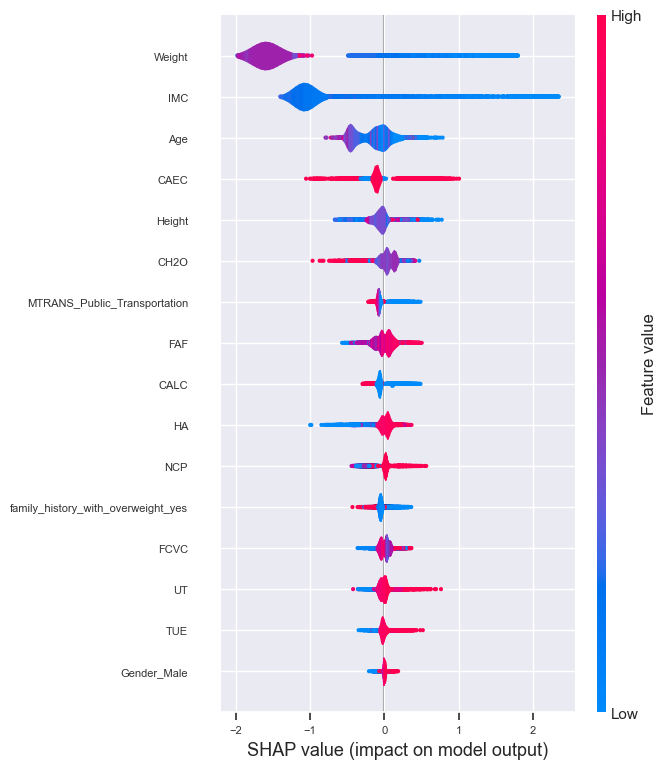


VIOLIN PLOT REPRESENTING <Peso normal>


(array([-3., -2., -1.,  0.,  1.,  2.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'CALC'),
  Text(0, 1, 'CAEC'),
  Text(0, 2, 'MTRANS_Public_Transportation'),
  Text(0, 3, 'UT'),
  Text(0, 4, 'FCVC'),
  Text(0, 5, 'HA'),
  Text(0, 6, 'Gender_Male'),
  Text(0, 7, 'NCP'),
  Text(0, 8, 'family_history_with_overweight_yes'),
  Text(0, 9, 'Height'),
  Text(0, 10, 'TUE'),
  Text(0, 11, 'Age'),
  Text(0, 12, 'FAF'),
  Text(0, 13, 'CH2O'),
  Text(0, 14, 'Weight'),
  Text(0, 15, 'IMC')])

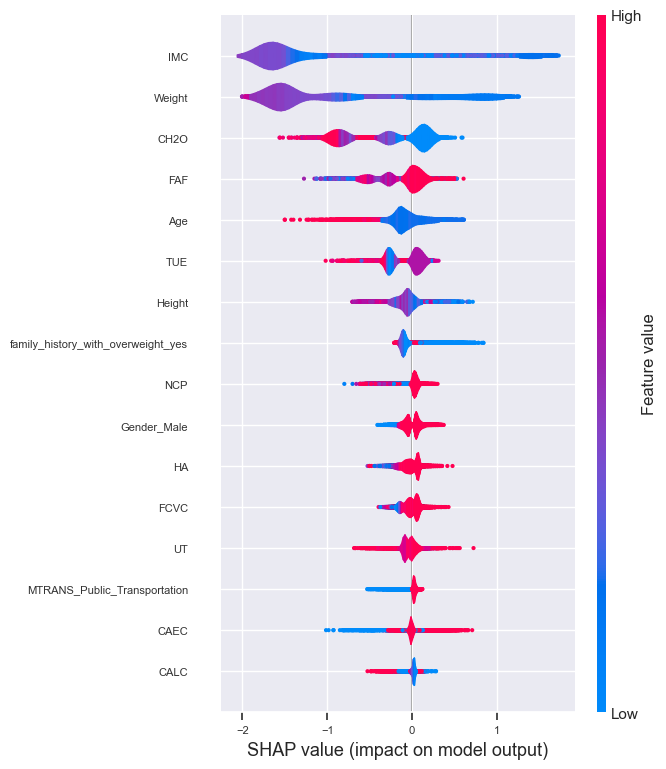


VIOLIN PLOT REPRESENTING <Sobrepeso Nivel I>


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'CAEC'),
  Text(0, 1, 'FAF'),
  Text(0, 2, 'UT'),
  Text(0, 3, 'Gender_Male'),
  Text(0, 4, 'NCP'),
  Text(0, 5, 'FCVC'),
  Text(0, 6, 'TUE'),
  Text(0, 7, 'MTRANS_Public_Transportation'),
  Text(0, 8, 'CH2O'),
  Text(0, 9, 'family_history_with_overweight_yes'),
  Text(0, 10, 'Height'),
  Text(0, 11, 'HA'),
  Text(0, 12, 'Age'),
  Text(0, 13, 'CALC'),
  Text(0, 14, 'IMC'),
  Text(0, 15, 'Weight')])

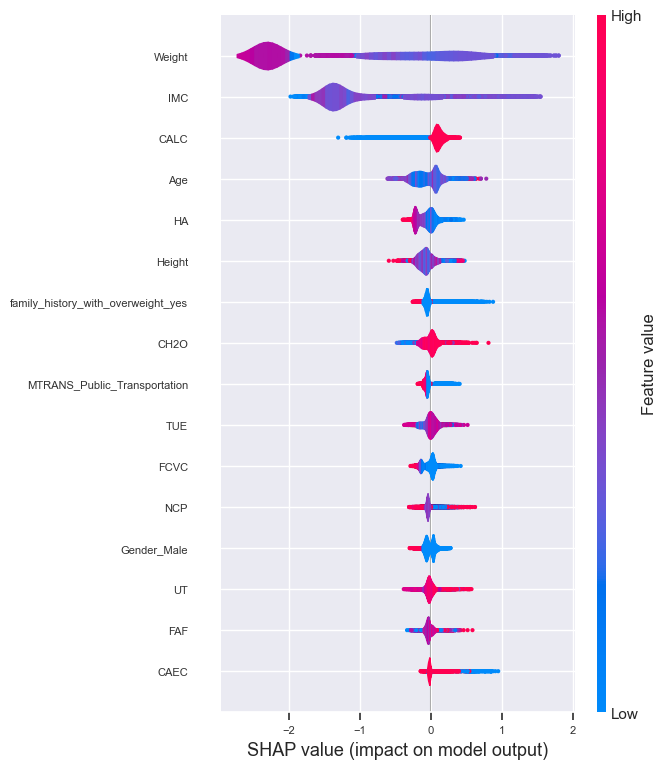


VIOLIN PLOT REPRESENTING <Sobrepeso Nivel II>


(array([-3., -2., -1.,  0.,  1.,  2.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'FCVC'),
  Text(0, 1, 'CAEC'),
  Text(0, 2, 'UT'),
  Text(0, 3, 'MTRANS_Public_Transportation'),
  Text(0, 4, 'CH2O'),
  Text(0, 5, 'FAF'),
  Text(0, 6, 'NCP'),
  Text(0, 7, 'HA'),
  Text(0, 8, 'family_history_with_overweight_yes'),
  Text(0, 9, 'TUE'),
  Text(0, 10, 'Gender_Male'),
  Text(0, 11, 'CALC'),
  Text(0, 12, 'Age'),
  Text(0, 13, 'Height'),
  Text(0, 14, 'IMC'),
  Text(0, 15, 'Weight')])

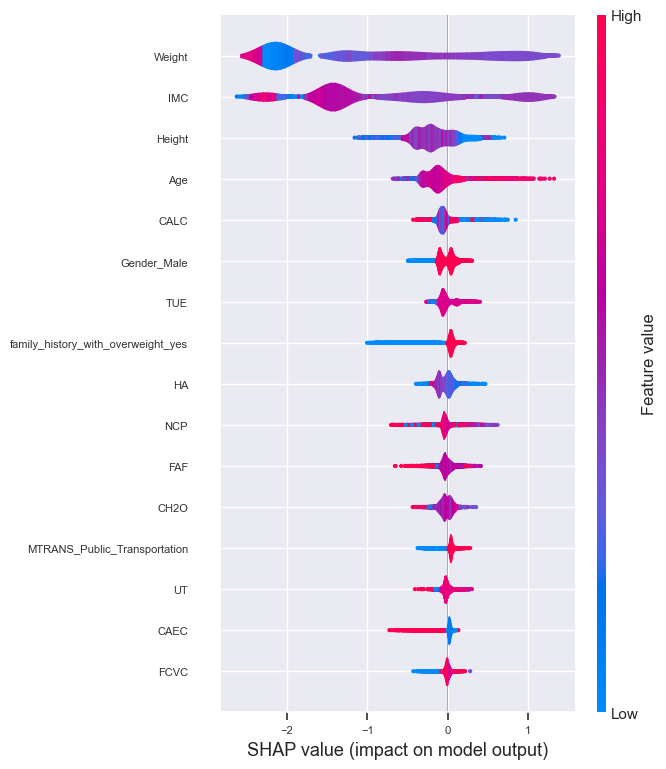


VIOLIN PLOT REPRESENTING <Obesidad Tipo I>


(array([-3., -2., -1.,  0.,  1.,  2.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'CAEC'),
  Text(0, 1, 'NCP'),
  Text(0, 2, 'MTRANS_Public_Transportation'),
  Text(0, 3, 'FAF'),
  Text(0, 4, 'family_history_with_overweight_yes'),
  Text(0, 5, 'UT'),
  Text(0, 6, 'TUE'),
  Text(0, 7, 'CALC'),
  Text(0, 8, 'Gender_Male'),
  Text(0, 9, 'HA'),
  Text(0, 10, 'Height'),
  Text(0, 11, 'CH2O'),
  Text(0, 12, 'FCVC'),
  Text(0, 13, 'Age'),
  Text(0, 14, 'Weight'),
  Text(0, 15, 'IMC')])

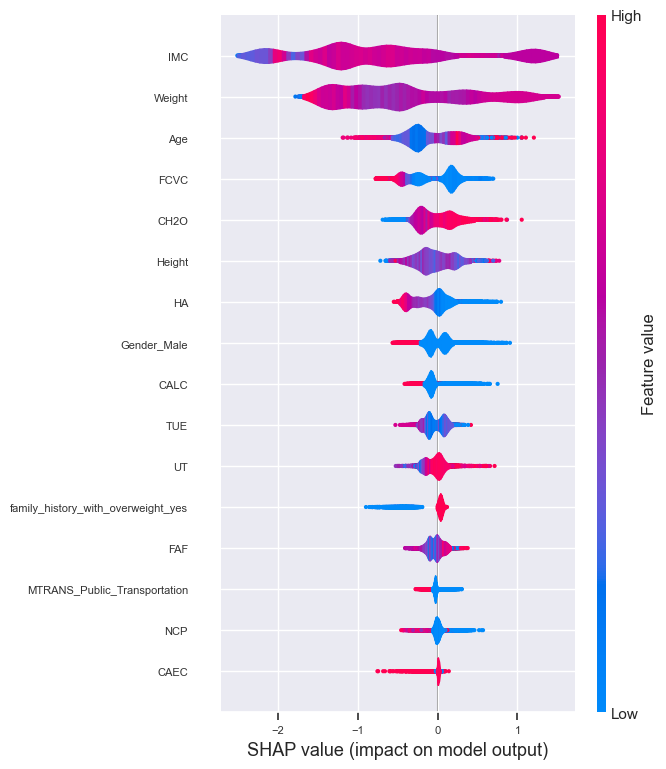


VIOLIN PLOT REPRESENTING <Obesidad Tipo II>


Exception ignored in: <function _xla_gc_callback at 0x0000029A73CA8EA0>
Traceback (most recent call last):
  File "c:\Users\0205301\envs\DS\Lib\site-packages\jax\_src\lib\__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
    
KeyboardInterrupt: 


(array([-3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'CAEC'),
  Text(0, 1, 'family_history_with_overweight_yes'),
  Text(0, 2, 'MTRANS_Public_Transportation'),
  Text(0, 3, 'TUE'),
  Text(0, 4, 'CALC'),
  Text(0, 5, 'NCP'),
  Text(0, 6, 'UT'),
  Text(0, 7, 'FAF'),
  Text(0, 8, 'FCVC'),
  Text(0, 9, 'CH2O'),
  Text(0, 10, 'Height'),
  Text(0, 11, 'HA'),
  Text(0, 12, 'Age'),
  Text(0, 13, 'IMC'),
  Text(0, 14, 'Gender_Male'),
  Text(0, 15, 'Weight')])

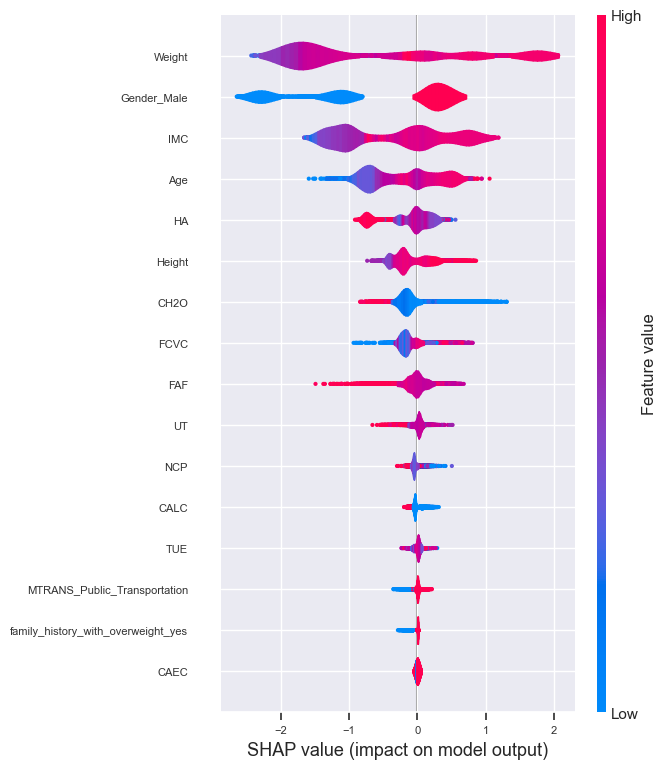


VIOLIN PLOT REPRESENTING <Obesidad Tipo III>


(array([-4., -3., -2., -1.,  0.,  1.,  2.,  3.]),
 [Text(-4.0, 0, '−4'),
  Text(-3.0, 0, '−3'),
  Text(-2.0, 0, '−2'),
  Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3')])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'CAEC'),
  Text(0, 1, 'family_history_with_overweight_yes'),
  Text(0, 2, 'NCP'),
  Text(0, 3, 'MTRANS_Public_Transportation'),
  Text(0, 4, 'FAF'),
  Text(0, 5, 'CALC'),
  Text(0, 6, 'Height'),
  Text(0, 7, 'CH2O'),
  Text(0, 8, 'Age'),
  Text(0, 9, 'UT'),
  Text(0, 10, 'TUE'),
  Text(0, 11, 'FCVC'),
  Text(0, 12, 'Weight'),
  Text(0, 13, 'Gender_Male'),
  Text(0, 14, 'IMC'),
  Text(0, 15, 'HA')])

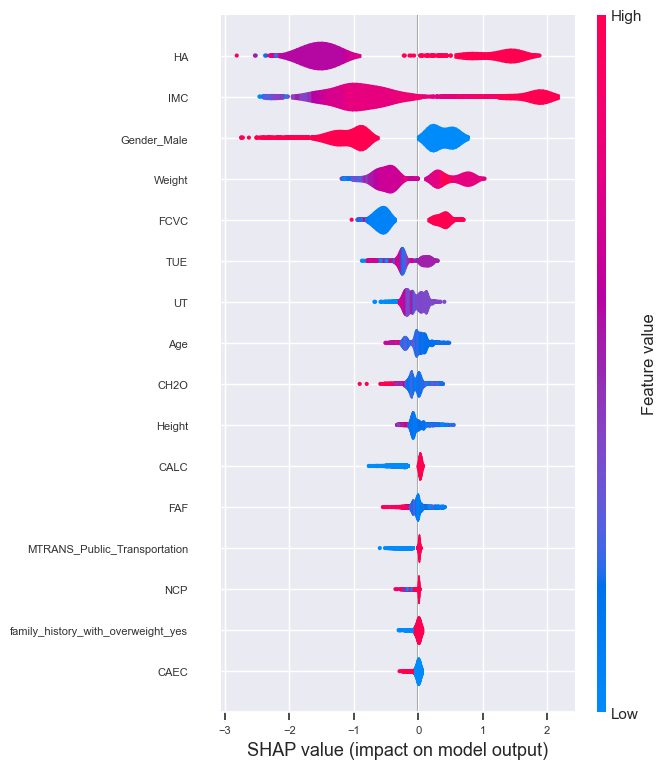

In [234]:
import shap
import matplotlib.pyplot as plt

for k, target_label in enumerate(dict_prediction.values()):
    print(f" Gráfica violin de <{target_label}>")
    shap.summary_plot(shap_values[:,k, :-1], X_train_fs.values,
                      plot_type="violin",
                      feature_names=feature_names, show=False);
    plt.xticks(fontsize=8);
    plt.yticks(fontsize=8);
    plt.show();
    print()

In [ ]:
# Feature importance in XGBoost
from xgboost import plot_importance
plot_importance(modelos['XGBoost'])
plt.show()

In [ ]:
#utiliza shap para explicar el modelo xgboost
import shap
explainer = shap.TreeExplainer(modelos['XGBoost'])
shap_values = explainer.shap_values(X_val_fs)
shap.summary_plot(shap_values, X_val_fs)


# 21. <a id='toc21_'></a>[Predicción](#toc0_)

In [115]:
selvars=['Age',
 'CAEC',
 'CALC',
 'CH2O',
 'FAF',
 'FCVC',
 'Gender_Male',
 'HA',
 'Height',
 'IMC',
 'MTRANS_Public_Transportation',
 'NCP',
 'TUE',
 'UT',
 'Weight',
 'family_history_with_overweight_yes']

In [116]:
dict_CAEC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}
dict_CALC={
    'no': 0,
    'Sometimes': 1,
    'Frequently': 2,
    'Always': 3}
def Feature_Engineering(df):
    df.set_index('id', inplace=True)
    df['IMC'] = df['Weight'] / (df['Height'] ** 2)
    df['HA'] = df['FCVC'] * df['NCP']
    df['UT'] = df['TUE'] / df['Age']
    df['CALC']=df['CALC'].map(dict_CALC)
    df['CAEC']=df['CAEC'].map(dict_CAEC)
    return df

In [124]:
def XEncoder(Pipeline,X):
    categorical_columns = X.columns[X.dtypes=="object"].tolist()
    numeric_columns_to_transform = X.columns[X.dtypes!="object"].tolist()    
    X_trans = Pipeline.transform(X)
    transformed_columns = []

    # Obtener columnas transformadas de OHE
    if categorical_columns:
        ohe_columns = Pipeline.named_steps['preprocessor'].named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out()
        transformed_columns.extend(ohe_columns)

    # Obtener columnas transformadas de variables numéricas
    numeric_transformer = Pipeline.named_steps['preprocessor'].named_transformers_['numeric'].named_steps['transformation']
    numeric_columns_transformed = [col for name, transformer, col in numeric_transformer.transformers_ if transformer != 'drop']
    transformed_columns.extend(numeric_columns_transformed)

    # Obtener columnas restantes
    remaining_columns = list(X.columns.difference(categorical_columns + numeric_columns_to_transform))
    transformed_columns.extend(remaining_columns)
    transformed_columns=list(pd.DataFrame(transformed_columns)[0].explode().dropna())
        
    return pd.DataFrame(X_trans, columns=transformed_columns)


In [117]:
# Read pipeline from pickle in PATH.MODELS:
with open(PATH.MODELS+'encoder_pipeline.pkl', 'rb') as f:
    piplEncoder = pickle.load(f)

In [120]:
v=df_test.head(1)
v
XEncoder(piplEncoder,v)
XEncoder(piplEncoder,v)[selvars]

In [136]:
XEncoder(piplEncoder,v)[selvars]

,Age,CAEC,CALC,CH2O,FAF,FCVC,Gender_Male,HA,Height,IMC,MTRANS_Public_Transportation,NCP,TUE,UT,Weight,family_history_with_overweight_yes
0,0.61,-0.26,0.42,1.34,0.03,0.94,1.00,0.87,1.69,0.63,1.00,0.37,-1.17,-1.12,1.21,1.00


In [174]:
# Load XGBoostClassifier from pickle in PATH.MODELS:
with open(PATH.MODELS+'XGBClassifier.pkl', 'rb') as f:
    XGBoostClassifier = pickle.load(f)

In [140]:
x=np.array(XEncoder(piplEncoder,v)[selvars])


In [153]:
XGBoostClassifier=tuned_models_pkl['XGBoost']

In [141]:
# predict_proba XGBoostClassifier
y_pred = XGBoostClassifier.predict(x)
y_pred

array([5], dtype=int64)

In [145]:
X_test.head(2)

,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age,NCP,Height,Weight,FCVC,CAEC,CH2O,FAF,TUE,CALC,IMC,HA,UT
0,1.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.58,0.38,1.66,1.24,0.94,-0.27,1.33,0.04,-1.15,0.43,0.65,0.89,-1.10
1,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.50,-2.58,-1.12,-0.80,-0.88,-0.27,1.64,0.22,-1.15,0.43,-0.49,-1.83,-1.10


In [213]:
y_pred = XGBoostClassifier.predict(x)[0]

In [215]:
y_pred_label=dict_prediction[y_pred]

In [216]:
y_pred_label

'Obesidad Tipo II'

In [220]:
pd.DataFrame(100*XGBoostClassifier.predict_proba(x),columns=dict_prediction.values())

,Peso insuficiente,Peso normal,Sobrepeso Nivel I,Sobrepeso Nivel II,Obesidad Tipo I,Obesidad Tipo II,Obesidad Tipo III
0,0.02,0.01,0.02,0.04,0.15,99.76,0.01
